In [1]:
#Import Libraries

import os
import cv2
import numpy as np
import pandas as pd
import mahotas as mt
from matplotlib import pyplot as plt
from skimage import io, measure

In [2]:
# Access the dataset folder

AllDatasetDirPath = r"D:\AI-Practical-Tasks\2023-2024\final\Group D\MangoLeafBD Dataset"
FolderList = my_list = os.listdir(AllDatasetDirPath)
print(FolderList) 

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [18]:
def create_dataset(dataset_dir):

    names = ['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity', 'major_axis', 'minor_axis', 'convex_area', 'convex_ratio', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b',  \
             'contrast','correlation','inverse_difference_moments','entropy', \
             'classlabel'
            ]
    
    all_dataset_results = pd.DataFrame(columns=names)

    for root, dirs, files in os.walk(dataset_dir):
        if len(dirs) > 0:
            categories = dirs
            break
 
    
    for i,category in enumerate(categories):
        df = pd.DataFrame([], columns=names)

        category_path = os.path.join(dataset_dir, category)
        class_label = categories.index(category)
        for filename in os.listdir(category_path):
            imgpath = os.path.join(category_path, filename)
            main_img = cv2.imread(imgpath)

            # Creating target labels
            classlabel = class_label


            # Preprocessing

            # Convert the image to RGB
            img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)

            # Convert the image to Grayscale
            gray = cv2.cvtColor(main_img,cv2.COLOR_BGR2GRAY)
            
            # Perform thresholding
            _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
            
            # Find contours
            contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            # Get the largest contour (assumed to be the leaf)
            leaf_contour = max(contours, key=cv2.contourArea)
            

            # Shape based features
            x, y, w, h = cv2.boundingRect(leaf_contour)
            area = cv2.contourArea(leaf_contour)
            perimeter = cv2.arcLength(leaf_contour, True)
            x, y, w, h = cv2.boundingRect(leaf_contour)
            physiological_length = max(w, h)
            physiological_width = min(w, h)
            aspect_ratio = float(physiological_length) / physiological_width
            rectangularity = area / (physiological_length * physiological_width)
            circularity = (4 * np.pi * area) / (perimeter ** 2)
            convex_area = cv2.contourArea(cv2.convexHull(leaf_contour))
            convex_ratio = area / convex_area


            # Color based features
            b, g, r = cv2.split(img)

            # Calculate mean and standard deviation for each channel
            mean_b = np.mean(b)
            mean_g = np.mean(g)
            mean_r = np.mean(r)

            std_b = np.std(b)
            std_g = np.std(g)
            std_r = np.std(r)

            
            # Texture based features
            textures = mt.features.haralick(gray)
            ht_mean = textures.mean(axis=0)
            contrast = ht_mean[1]
            correlation = ht_mean[2]
            inverse_diff_moments = ht_mean[4]
            entropy = ht_mean[8]
            

            vector = [area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,w,h,convex_area,convex_ratio, \
                    mean_r,mean_g,mean_b,std_r,std_g,std_b,\
                    contrast,correlation,inverse_diff_moments,entropy,\
                    classlabel
                    ]
            
           
            # Append the feature vector to the DataFrame
            df_temp = pd.DataFrame([vector], columns=names)
            all_dataset_results = pd.concat([all_dataset_results, df_temp], ignore_index=True)


    return all_dataset_results

In [19]:
dataset = create_dataset(AllDatasetDirPath)
dataset.to_csv('features.csv')

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']
0


C:\Users\sakor\AppData\Local\Temp\ipykernel_2012\1692349117.py:94: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_dataset_results = pd.concat([all_dataset_results, df_temp], ignore_index=True)


1
2
3
4
5
6
7


In [23]:
dataset.shape

(4000, 22)

In [30]:
dataset.head()

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,major_axis,minor_axis,convex_area,...,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy,classlabel
0,17236.5,751.546244,259,112,2.312500,0.594198,0.383484,112,259,19932.5,...,166.094727,154.148958,59.423466,26.382730,18.001588,10.731971,0.992615,0.667995,8.494116,0
1,16122.5,751.889390,258,101,2.554455,0.618716,0.358372,101,258,18631.5,...,169.204805,157.146393,58.009444,25.463528,17.492831,11.945924,0.991202,0.667219,8.586526,0
2,19900.5,905.997035,320,117,2.735043,0.531530,0.304663,117,320,24944.5,...,157.709544,146.070885,61.024088,29.436061,22.680588,11.718123,0.993511,0.624838,9.203114,0
3,23603.5,926.222429,320,115,2.782609,0.641399,0.345745,115,320,25779.0,...,155.398958,143.729701,57.784381,29.392155,24.328512,12.300646,0.993161,0.623637,9.321460,0
4,21477.0,798.901583,320,96,3.333333,0.699121,0.422860,96,320,22713.0,...,168.528789,157.399310,65.547638,33.895692,24.244650,21.505493,0.990561,0.579790,9.424601,0


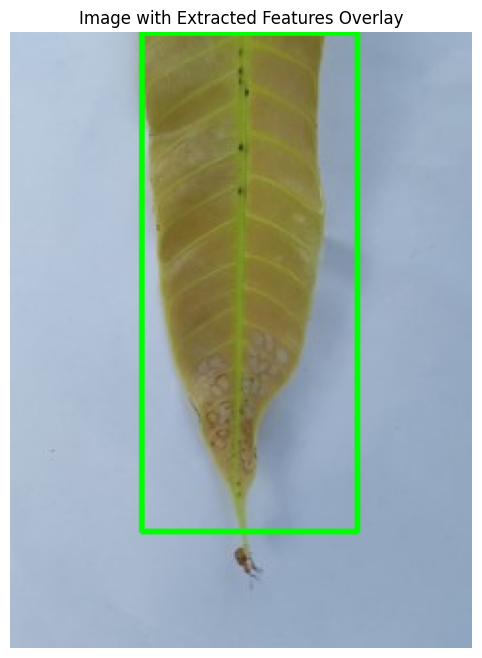

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mahotas

def overlay_features(image_path):
    # Read the image
    main_img = cv2.imread(image_path)
    original_img = main_img.copy()  # Create a copy for visualization

    # Preprocessing
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(main_img, cv2.COLOR_BGR2GRAY)
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    leaf_contour = max(contours, key=cv2.contourArea)

    # Extract features
    x, y, w, h = cv2.boundingRect(leaf_contour)
    area = cv2.contourArea(leaf_contour)
    perimeter = cv2.arcLength(leaf_contour, True)
    physiological_length = max(w, h)
    physiological_width = min(w, h)
    aspect_ratio = float(physiological_length) / physiological_width
    rectangularity = area / (physiological_length * physiological_width)
    circularity = (4 * np.pi * area) / (perimeter ** 2)
    convex_area = cv2.contourArea(cv2.convexHull(leaf_contour))
    convex_ratio = area / convex_area

    b, g, r = cv2.split(img)
    mean_b = np.mean(b)
    mean_g = np.mean(g)
    mean_r = np.mean(r)
    std_b = np.std(b)
    std_g = np.std(g)
    std_r = np.std(r)

    textures = mahotas.features.haralick(gray)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]

    # Visualize the image with features overlay
    cv2.rectangle(original_img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw bounding box

    # Annotate extracted features
    text = f"Area: {area:.2f}, Perimeter: {perimeter:.2f}, Aspect Ratio: {aspect_ratio:.2f}"
    cv2.putText(original_img, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

    # Display the image with annotations
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title('Image with Extracted Features Overlay')
    plt.axis('off')
    plt.show()

# Example usage
image_path = r'D:\AI-Practical-Tasks\2023-2024\final\Group D\MangoLeafBD Dataset\Anthracnose\20211008_124249 (Custom).jpg'  # Replace this with the path to your image file
overlay_features(image_path)
